In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline
pd.set_option('display.max_columns', None)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

#### Multiple Regression 
Fitting a straight line across the data

- Independant Variables          - `Yi` x 52
    
- Dependant Variable     - `souspecCO2`
    
*left out `YiAR` because it was showing unusually high partial correlation with `souspecCO2` and did not have a corresponding `souspecAR` variable either*

In [4]:
df = pd.read_csv("flattened_dataset.csv")

In [5]:
independant_variables = df.iloc[:, :52]
dependant_variables   = df.loc[:, 'souspecCO2']
data = pd.concat([independant_variables, dependant_variables], axis=1)

In [6]:
regr = linear_model.LinearRegression(fit_intercept=True) 
# fit intercept normalizes the data (x-x̅)

regr.fit(independant_variables, dependant_variables)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Partial Correlations of each independant variable

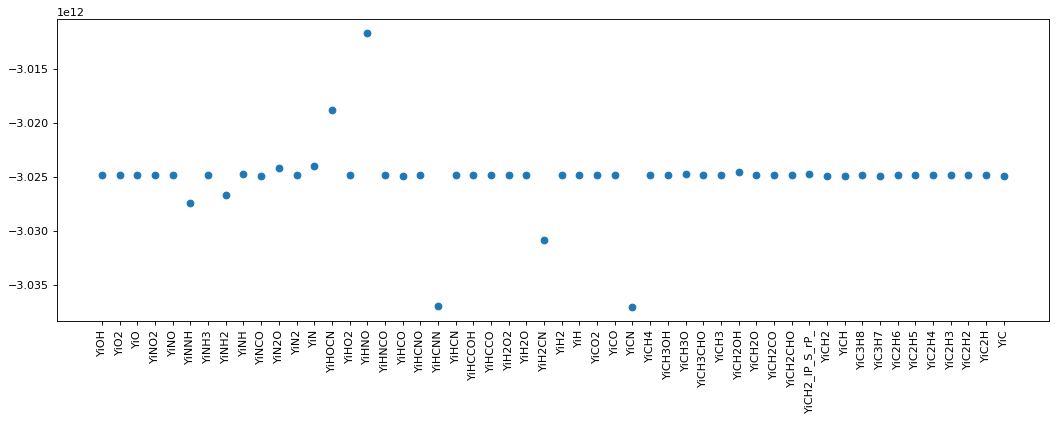

In [7]:
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(np.arange(len(regr.coef_)), regr.coef_)
a = plt.xticks(np.arange(len(regr.coef_)), independant_variables.columns, rotation='vertical')

#### R-squared score

In [8]:
regr.score(independant_variables, dependant_variables)

0.9978836307531493

#### Residual Values

In [28]:
residues = abs((regr.predict(independant_variables) - dependant_variables))

<Figure size 1280x400 with 0 Axes>

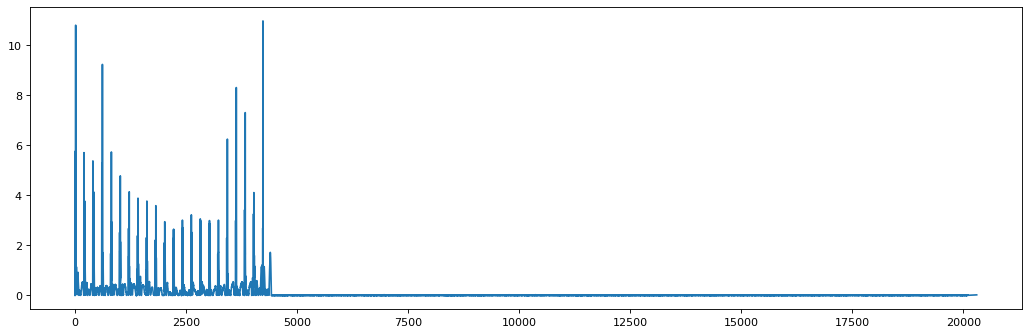

In [31]:
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(residues)